<a href="https://colab.research.google.com/github/JuyongLee1/tmlab_github/blob/main/BERTopic_TMLAB_0914.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# 필요한 라이브러리 설치
!pip install bertopic

In [ ]:
import pandas as pd
import numpy as np
import re
from bertopic import BERTopic
from bertopic import _utils
from sklearn.feature_extraction.text import CountVectorizer, ENGLISH_STOP_WORDS
from bertopic.vectorizers import ClassTfidfTransformer
from bertopic.representation import KeyBERTInspired
from bertopic.representation import MaximalMarginalRelevance
import matplotlib.pyplot as plt

In [ ]:
# 엑셀 파일을 pandas DataFrame으로 읽어옵니다
data = pd.read_excel('patent_dataset.xlsx')

# NaN 값을 제거하거나 특정 값으로 대체합니다
data['Abstract'].fillna('', inplace=True)
data['Claims'].fillna('', inplace=True)

# 데이터를 문자열로 변환
data['Abstract'] = data['Abstract'].astype(str)
data['Claims'] = data['Claims'].astype(str)

# "publication date" 열에서 날짜 정보를 추출하여 리스트로 만듭니다
data['publication date'] = pd.to_datetime(data['publication date'], errors='coerce')

# 유효한 날짜 데이터만 남기고 NaN 값을 제거합니다
data = data.dropna(subset=['publication date'])

# "publication date" 열이 2022년 12월 31일 이전인 데이터만 필터링합니다
filtered_data = data[data['publication date'] <= '2022-12-31']

# 문장 쌍을 병합하여 하나의 텍스트로 만듭니다
docs = filtered_data['Abstract'] + ' ' + filtered_data['Claims']

In [ ]:
# docs: 텍스트 데이터 리스트 또는 배열

# Vectorization model (CountVectorizer) 설정
vectorizer_model = CountVectorizer(stop_words="english")

# Class TF-IDF 모델 설정
ctfidf_model = ClassTfidfTransformer(reduce_frequent_words=True)

# 키워드를 최대한 다양하게 하고싶을때
representation_model = MaximalMarginalRelevance(diversity=0.2)
# 주요 키워드 위주로 하고싶을때
#representation_model = KeyBERTInspired()

# BERTopic 모델을 초기화하고 토픽 모델링 수행 (토픽은 10개로 만들기 위해 nr_topics=11로 세팅)
topic_model = BERTopic(vectorizer_model=vectorizer_model, nr_topics=11, verbose=True)

# 토픽 모델링 수행
topics, probs = topic_model.fit_transform(docs)

Batches:   0%|          | 0/175 [00:00<?, ?it/s]

2023-09-13 09:02:23,841 - BERTopic - Transformed documents to Embeddings
2023-09-13 09:02:49,004 - BERTopic - Reduced dimensionality
2023-09-13 09:02:49,245 - BERTopic - Clustered reduced embeddings
2023-09-13 09:03:06,970 - BERTopic - Reduced number of topics from 82 to 11


In [ ]:
# 토픽 빈도 출력
topic_freq = topic_model.get_topic_freq()
print(topic_freq)

    Topic  Count
0      -1   1915
1       0   1154
3       1    907
2       2    576
5       3    358
7       4    283
6       5    206
4       6    123
8       7     22
9       8     13
10      9     12


In [ ]:
topic_model.get_topic_info()

,Topic,Count,Name,Representation,Representative_Docs
0,-1,1915,-1_battery_said_method_second,"[battery, said, method, second, comprising, ac...",[Abstract The present invention describes a mo...
1,0,1154,0_electrode_material_lithium_battery,"[electrode, material, lithium, battery, metal,...",[Abstract A lithium secondary battery comprisi...
2,1,907,1_device_power_data_battery,"[device, power, data, battery, energy, configu...",[Abstract The invention relates to electrotech...
3,2,576,2_heat_temperature_battery_thermal,"[heat, temperature, battery, thermal, cooling,...",[Abstract A battery heat exchanger 10 exchange...
4,3,358,3_layer_solar_second_light,"[layer, solar, second, light, substrate, photo...",[Abstract A thin film compound solar cell comp...
5,4,283,4_method_comprising_sample_comprises,"[method, comprising, sample, comprises, cell, ...",[Abstract Methods are provided for the assay o...
6,5,206,5_fuel_hydrogen_gas_cell,"[fuel, hydrogen, gas, cell, water, fluid, said...",[Abstract The present invention is provided wi...
7,6,123,6_layer_material_composition_method,"[layer, material, composition, method, thermop...",[Abstract In line systems and in line methods ...
8,7,22,7_dressing_layer_tissue_site,"[dressing, layer, tissue, site, manifold, foam...",[Abstract A dressing may include first layer a...
9,8,13,8_ray_radiation_imaging_source,"[ray, radiation, imaging, source, image, accor...",[Abstract System and method for imaging an int...


In [ ]:
# 특정 토픽의 단어들을 출력
topic_words = topic_model.get_topic(2)
formatted_topic_words = '\n'.join([f"{word}: {score}" for word, score in topic_words])
print(formatted_topic_words)

heat: 0.0731858371690614
temperature: 0.04665175241861873
battery: 0.043592146172904536
thermal: 0.03857901511711563
cooling: 0.035347718895222396
device: 0.032309483262547414
air: 0.03182952339082666
fluid: 0.03171148034690543
heating: 0.030275239146355205
second: 0.02974527002137888


In [ ]:
topic_model.visualize_barchart(top_n_topics=99, n_words=9) #, width=650

In [ ]:
# 토픽 시각화
topic_model.visualize_topics() #topics=[2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17]

In [ ]:
# 토픽 계층 시각화
hierarchical_topics = topic_model.hierarchical_topics(docs)
topic_model.visualize_hierarchy(hierarchical_topics=hierarchical_topics)

100%|██████████| 9/9 [00:00<00:00, 130.03it/s]


In [ ]:
# 토픽 문서 시각화 (쫌 오래걸림)
topic_model.visualize_hierarchical_documents(docs, hierarchical_topics)

In [ ]:
# 토픽 히트맵 시각화
topic_model.visualize_heatmap()

In [ ]:
#term score decline
topic_model.visualize_term_rank()

In [ ]:
#term score decline (log scale)
topic_model.visualize_term_rank(log_scale=True)

In [ ]:
# Calculate the topic distributions on a token-level
topic_distr, topic_token_distr = topic_model.approximate_distribution(docs, calculate_tokens=True)

# Visualize the token-level distributions
df = topic_model.visualize_approximate_distribution(docs[1], topic_token_distr[1])
df

100%|██████████| 6/6 [01:50<00:00, 18.41s/it]


,Abstract,high,energy,density,lithium,ion,battery,the,materials,system,therefor,being,high,voltage,solid,lithium,cobalt,oxide,as,the,positive,electrode,high,voltage,solid,and,high,capacity,modified,natural,graphite,as,the,negative,electrode,and,graphene,as,an,electrically,conductive,additive,In,the,present,invention,the,use,of,high,gram,specific,capacity,high,voltage,solid,positive,and,negative,electrode,materials,system,increases,the,amount,of,active,materials,per,unit,volume,and,the,volumetric,energy,density,of,the,battery,The,use,of,highly,electrically,conductive,graphene,as,an,electrically,conductive,additive,allows,for,avoiding,the,need,to,use,of,large,amount,of,conventional,electrically,conductive,agent,and,thereby,reduces,disadvantages,in,respect,of,the,ratio,of,the,active,materials,of,the,positive,and,negative,electrodes,which,further,increases,the,volumetric,energy,density,of,the,battery,The,use,of,an,electrolyte,not,containing,PC,solvent,prevents,the,PC,from,eroding,the,natural,graphite,ensuring,the,cyclical,stability,of,the,battery,The,present,invention,involves,simple,process,and,produces,high,performing,lithium,battery,having,volumetric,energy,density,30,to,50,higher,than,that,of,ordinary,lithium,batteries,high,energy,density,lithium,ion,battery,characterized,in,that,the,material,system,is,high,pressure,solid,lithium,cobalt,oxide,as,positive,electrode,high,pressure,solid,and,high,capacity,natural,modified,graphite,as,negative,electrode,graphene,as,conductive,additive,lithium,cobaltate,positive,electrode,The,material,has,specific,capacity,of,155,162,mAh,first,efficiency,of,96,99,double,sided,density,of,30,50,mg,cm,positive,compaction,density,of,cm,and,graphite,negative,electrode,material,The,capacity,is,350,to,360,mAh,the,first,efficiency,is,94,to,96,the,negative,electrode,compaction,density,is,to,cm,and,the,negative,electrode,sheet,surface,density,is,to,10,in,terms,of,the,corresponding,positive,electrode,active,material,excess,ratio,The,high,energy,density,lithium,ion,battery,according,to,wherein,the,positive,electrode,tab,is,made,by


In [ ]:
# To visualize the topic distributions in a document
topic_model.visualize_distribution(topic_distr[0])

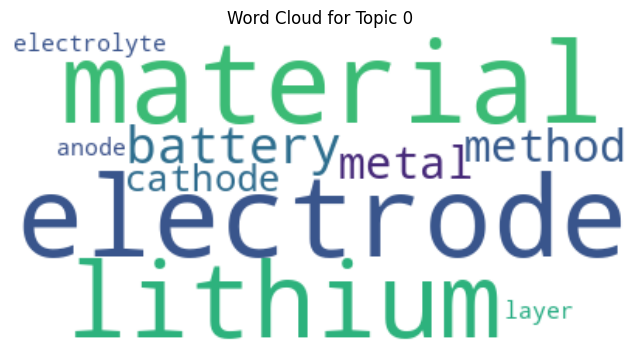

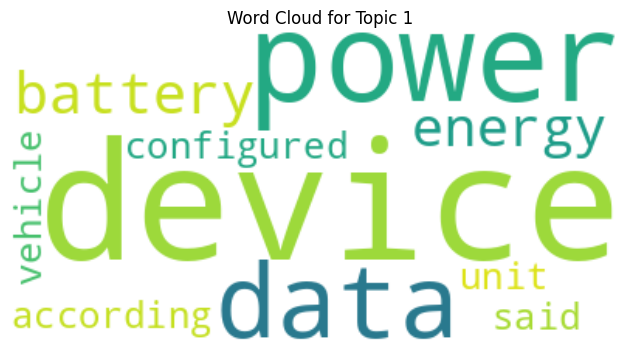

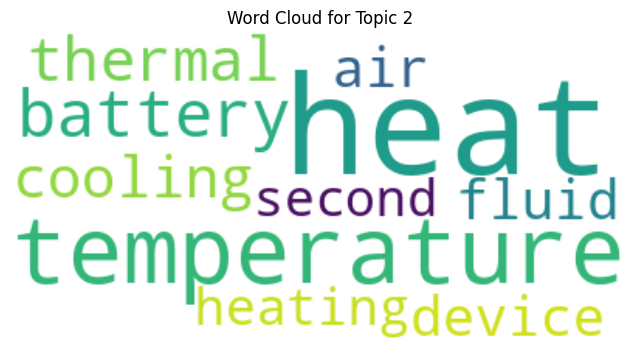

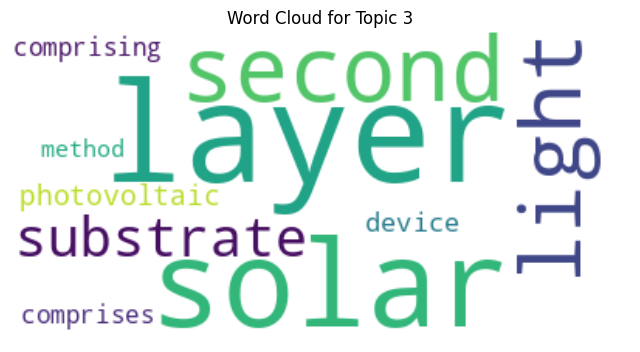

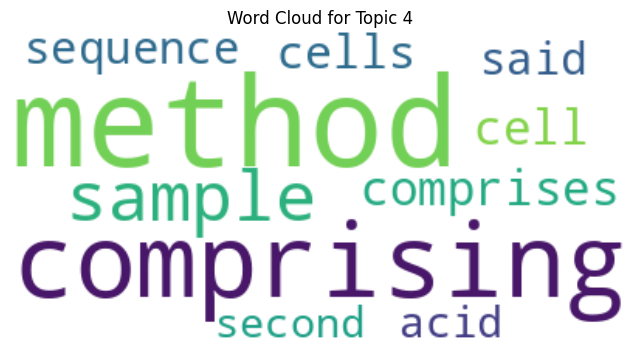

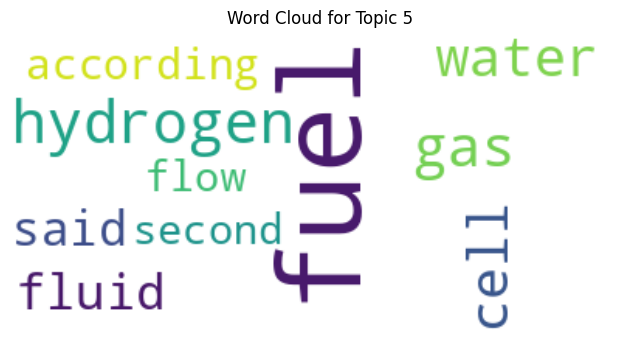

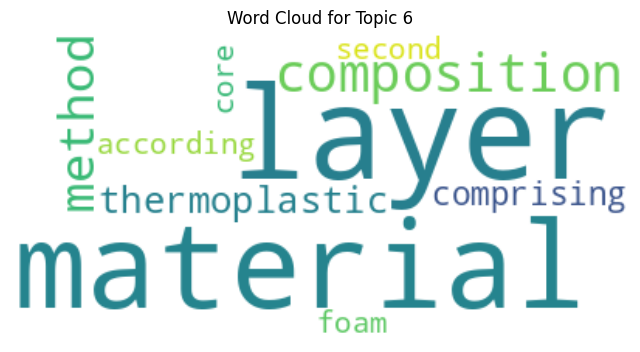

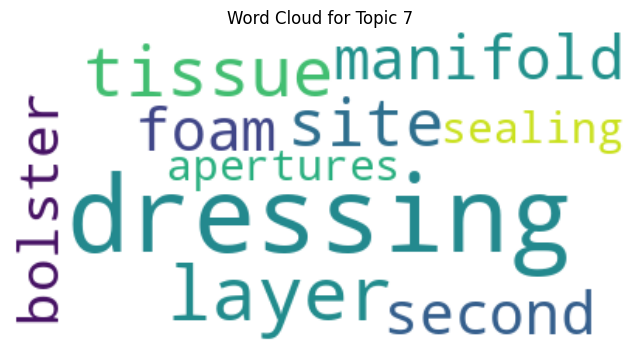

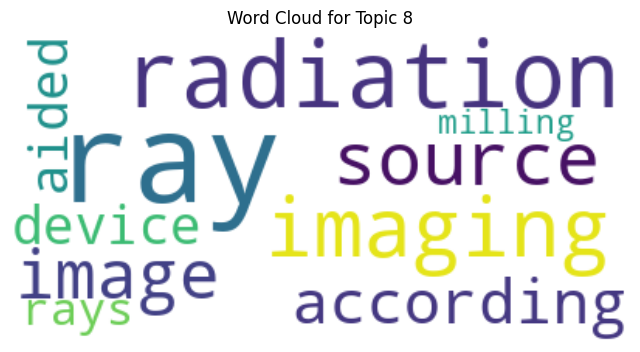

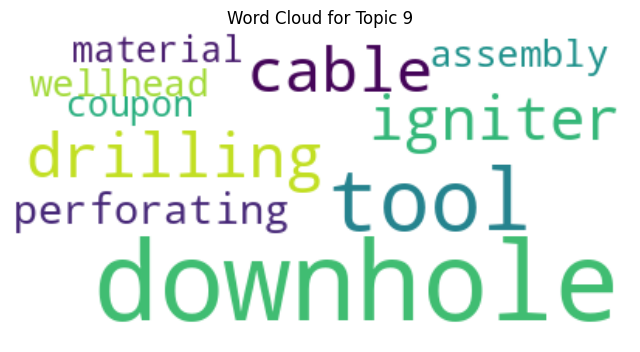

TypeError: ignored

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

def create_wordcloud(model, topic):
    text = {word: value for word, value in model.get_topic(topic)}
    wc = WordCloud(background_color="white", max_words=1000)
    wc.generate_from_frequencies(text)
    plt.figure(figsize=(8, 6))
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
    plt.title(f"Word Cloud for Topic {topic}")
    plt.show()

# Show wordclouds for all topics
for topic in range(len(topic_model.get_topics())):
    create_wordcloud(topic_model, topic=topic)

<Figure size 1500x2000 with 0 Axes>

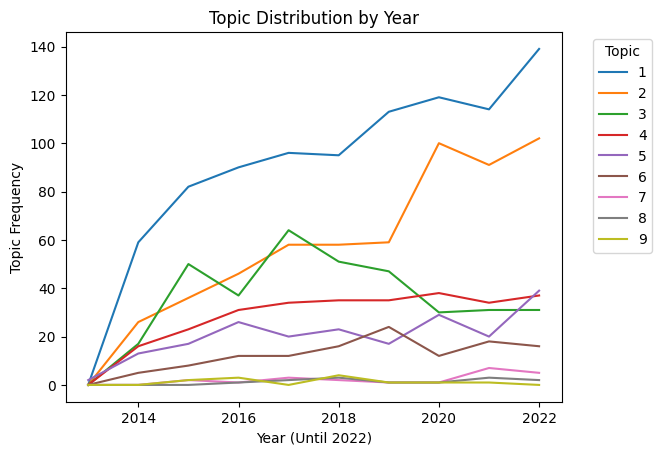

In [ ]:
# "publication date" 컬럼에서 연도 정보를 추출하여 리스트로 만듭니다
data['priority date'] = pd.to_datetime(data['publication date'])
filtered_data = data[data['publication date'] <= '2022-12-31']
years = filtered_data['publication date'].dt.year.tolist()

# 토픽 및 연도를 묶어서 데이터프레임 생성
min_length = min(len(topics), len(years))
topic_df = pd.DataFrame({'Topic': topics[:min_length], 'Year': years[:min_length]})
# Topic 0을 제외한 행을 필터링한 데이터프레임을 만듭니다
filtered_topic_df = topic_df[(topic_df['Topic'] != -1) & (topic_df['Topic'] != 0) ]

# 연도별 토픽 분포를 계산합니다
topic_distribution_by_year = filtered_topic_df.groupby(['Year', 'Topic']).size().unstack(fill_value=0)


# 시각화
plt.figure(figsize=(15, 20))
topic_distribution_by_year[topic_distribution_by_year.index <= 2022].plot(kind='line')
plt.xlabel('Year (Until 2022)')
plt.ylabel('Topic Frequency')
plt.title('Topic Distribution by Year')
plt.legend(title='Topic', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

In [ ]:
#모델 저장하기
topic_model.save("my_topics_model_0811")